<a href="https://colab.research.google.com/github/Manasi758/TCS-iON-Rio-125-Forecasting-System/blob/main/Data_Cleaning_and_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf

sales=pd.read_csv("/content/drive/MyDrive/train.csv")
sales.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
sales.shape

(9800, 18)

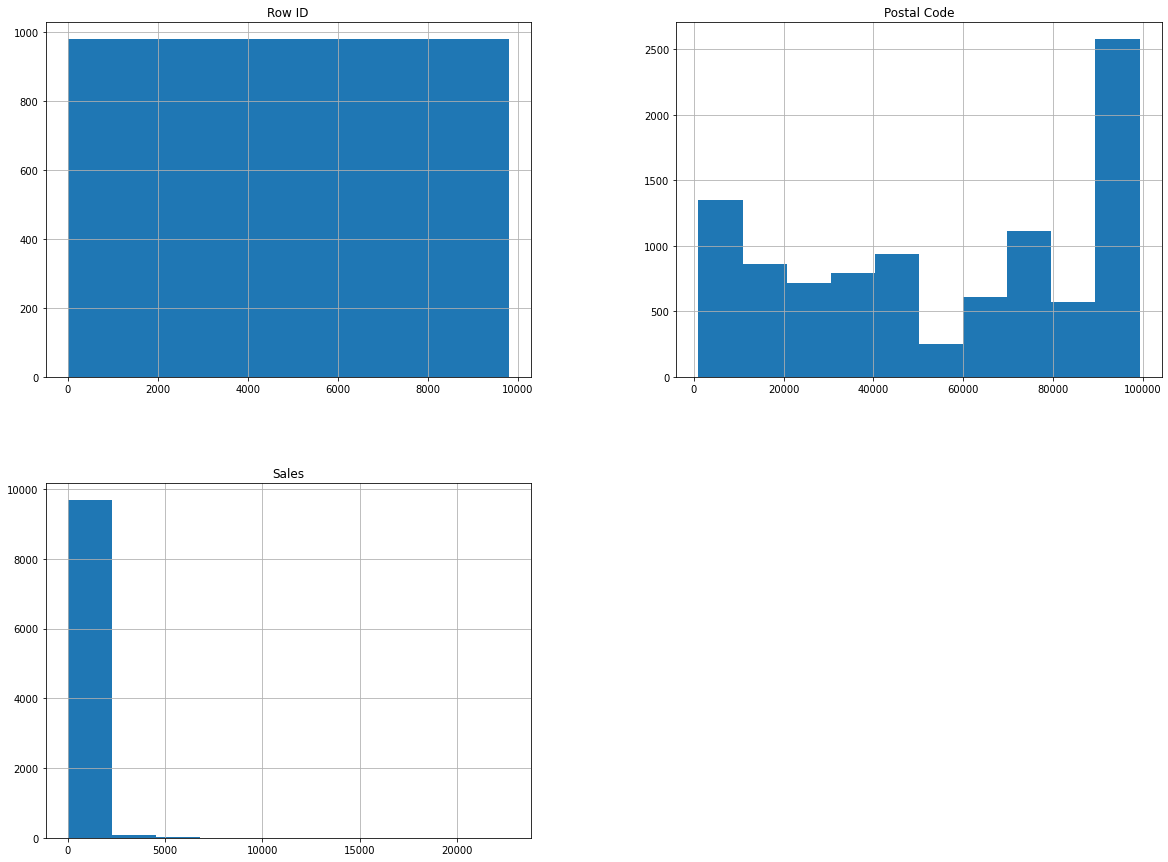

In [ ]:
sales.hist(figsize=(20,15))
plt.show()

In [ ]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
sales.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,0.001151
Postal Code,0.013645,1.000000,-0.024067
Sales,0.001151,-0.024067,1.000000


In [ ]:
sales.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
sales.dropna(inplace=True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
sales.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
sales.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [ ]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')

#Convert Order Date to Datetime
sales['Order Date']= pd.to_datetime(sales['Order Date'])
#Create a Month Year Column
sales['Year Month'] = sales['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
sales_trend = pd.DataFrame(sales.groupby('Year Month').sum()['Sales'].reset_index())
sales_trend

,Year Month,Sales
0,2015-01,28828.2540
1,2015-02,12588.4840
2,2015-03,54027.6920
3,2015-04,24710.0160
4,2015-05,29520.4900
5,2015-06,29181.3346
6,2015-07,35194.5580
7,2015-08,37349.2655
8,2015-09,65956.3998
9,2015-10,34561.9470


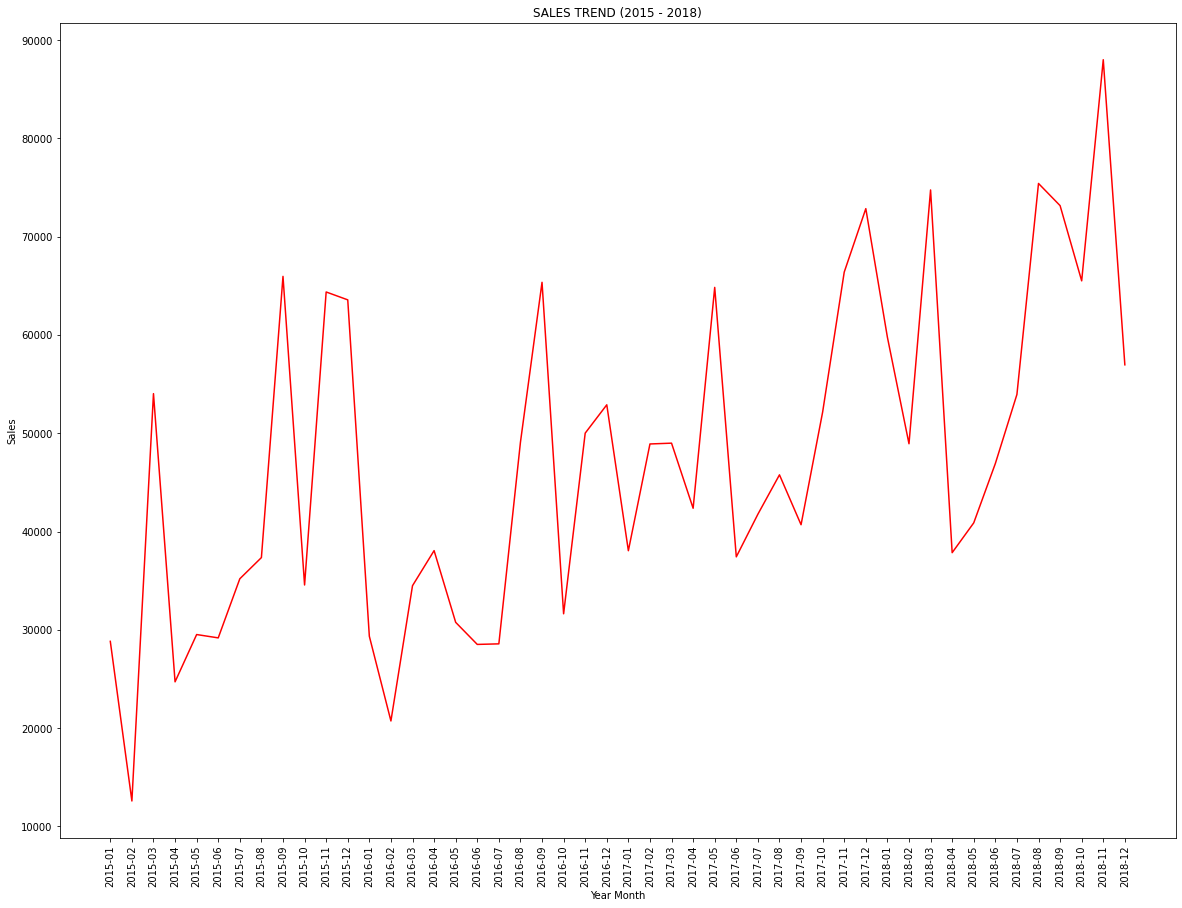

In [ ]:
plt.figure( figsize =(20,15))
plt.xticks(rotation = 'vertical', size =10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'], color = 'red')
plt.title('SALES TREND (2015 - 2018)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()